# Preparación de los datos

In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_folder = {
    "estaciones": "datos/estaciones",
    "diarios": "datos/diarios",
    "horarios": "datos/horarios",
}

## Carga de datasets

En principio vamos a trabajar sobre los dataset de estaciones de medición y mediciones diarias, dejando para un análisis posterior el conjunto de mediciones horarias.

In [3]:
# Estaciones de medición
filename = os.path.join(data_folder["estaciones"], "estaciones.csv")
estaciones = pd.read_csv(filename, sep=";")

# Calidad del aire. Mediciones diarias
filename = os.path.join(data_folder["diarios"], "mediciones_diarias.csv")
calidad_d = pd.read_csv(filename, sep=";")


En primer lugar vamos a revisar el dataset de estaciones de medición. Por cada estación se se dispone de los datos de dirección y ubicación exactas, así como si se registran algunas de las magnitudes más relevantes.

In [4]:
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODIGO               24 non-null     int64  
 1   CODIGO_CORTO         24 non-null     int64  
 2   ESTACION             24 non-null     object 
 3   DIRECCION            24 non-null     object 
 4   LONGITUD_ETRS89      24 non-null     object 
 5   LATITUD_ETRS89       24 non-null     object 
 6   ALTITUD              24 non-null     int64  
 7   COD_TIPO             24 non-null     object 
 8   NOM_TIPO             24 non-null     object 
 9   NO2                  24 non-null     object 
 10  SO2                  5 non-null      object 
 11  CO                   5 non-null      object 
 12  PM10                 13 non-null     object 
 13  PM2_5                8 non-null      object 
 14  O3                   13 non-null     object 
 15  BTX                  6 non-null      objec

In [5]:
estaciones[["CODIGO", "DIRECCION", "NO2", "SO2", "CO", "PM10", "PM2_5", "O3", "BTX"]]

,CODIGO,DIRECCION,NO2,SO2,CO,PM10,PM2_5,O3,BTX
0,28079004,Plaza de España,X,X,X,NaN,NaN,NaN,NaN
1,28079008,Entre C/ Alcalá y C/ O’ Donell,X,X,X,X,X,X,X
2,28079011,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,X,NaN,NaN,NaN,NaN,NaN,X
3,28079016,C/ Arturo Soria esq. C/ Vizconde de los Asilos,X,NaN,NaN,NaN,NaN,X,NaN
4,28079017,C/ Juan Peñalver,X,NaN,NaN,NaN,NaN,X,NaN
5,28079018,C/ Farolillo - C/ Ervigio,X,NaN,X,X,NaN,X,X
6,28079024,Casa de Campo (Terminal del Teleférico),X,NaN,NaN,X,X,X,X
7,28079027,"C/ Júpiter, 21",X,NaN,NaN,NaN,NaN,X,NaN
8,28079035,Plaza del Carmen esq. Tres Cruces,X,X,X,NaN,NaN,X,NaN
9,28079036,Avda. Moratalaz esq. Camino de los Vinateros,X,X,NaN,X,NaN,NaN,NaN


El NO2 (Dióxido de Nitrógeno) lo miden todas las estaciones por lo que sería una magnitud candidata a ser analizada con más detalle. Las magnitudes O3, PM10 y PM2,5 le siguen en orden. El **dióxido de nitrógeno (NO2)** es un contaminante atmosférico cuyas fuentes fundamentales son el tráfico rodado así como las emisiones de determinadas industrias y de calefacciones de carbón (en desuso actualmente). Sus niveles en la atmósfera están aumentando en los últimos años por la mayor utilización de gasolina diésel. Su presencia en el aire contribuye a la formación y modificación de otros contaminantes atmosféricos tales como el **ozono** y las **partículas en suspensión (PM10 y PM 2,5)**.

In [6]:
calidad_d["MAGNITUD"].value_counts()

7     4979
8     4979
12    4979
14    2812
10    2497
1     2326
6     2265
9     1130
20    1103
30    1103
35    1097
42     709
43     709
44     708
Name: MAGNITUD, dtype: int64

Vemos que, efectivamente, las magnitudes de las que se tienen más mediciones son el NO, NO2, NOx, Ozono y Partículas PM10.

Vamos a estudiar las mediciones de NO2. Por tanto, vamos a seleccionar únicamente los registros correspondientes a las mediciones de NO2.

In [7]:
df_no2 = calidad_d[calidad_d["MAGNITUD"] == 7].copy()
df_no2.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
14,28,79,4,7,28079004_7_8,2022,3,0.0,N,0.0,...,0.0,N,11.0,V,5.0,V,5.0,V,3.0,V
15,28,79,4,7,28079004_7_8,2022,4,4.0,V,3.0,...,3.0,V,14.0,V,5.0,V,13.0,V,0.0,N
16,28,79,4,7,28079004_7_8,2022,5,9.0,V,2.0,...,4.0,V,3.0,V,5.0,V,2.0,V,9.0,V
17,28,79,4,7,28079004_7_8,2022,6,4.0,V,4.0,...,2.0,V,3.0,V,7.0,V,3.0,V,0.0,N
18,28,79,4,7,28079004_7_8,2022,7,3.0,V,2.0,...,2.0,V,6.0,V,6.0,V,2.0,V,4.0,V


In [8]:
df_no2.shape

(4979, 69)

In [9]:
# Calculamos la media de las medición de ese día, únicamente si son válidas (V<dia_correspondiente> = "S")
df_no2[df_no2["V01"]=="V"].groupby(by=["ANO", "MES"], as_index=False)["D01"].mean()

,ANO,MES,D01
0,2001,1,47.583333
1,2001,2,126.750000
2,2001,3,84.583333
3,2001,4,20.636364
4,2001,5,9.727273
...,...,...,...
256,2022,5,3.333333
257,2022,6,5.250000
258,2022,7,2.478261
259,2022,8,2.956522


Una vez que hemos validado que la consulta de agrupación es la correcta, vamos a crear un dataframe que contenga por cada día, la media de las mediciones de todas las estaciones, siempre y cuando tenga el flag de válida (`V<día> = "S"`)

In [10]:
fechas = []
mediciones = []

for i in range(1, 32):
    n_day = f"{i:02d}"
    dato_dia = f"D{n_day}"      # columna de la medición del día del mes
    validez_dia = f"V{n_day}"   # columna de validez de la medición del día del mes
    # Calculamos la media de las medición de ese día, únicamente si son válidas (V<dia_correspondiente> = "S")
    group_periodo = df_no2[df_no2[validez_dia]=="V"].groupby(by=["ANO", "MES"], as_index=False)[dato_dia].mean()
    for row in range(len(group_periodo)):
        fecha_medicion = str(int(group_periodo.iloc[row]['ANO'])) + "-" + str(int(group_periodo.iloc[row]['MES'])) + "-" + str(i)
        fechas.append(datetime.strptime(fecha_medicion, '%Y-%m-%d'))
        mediciones.append(group_periodo.iloc[row][dato_dia])

datos = {
    "fecha": fechas,
    "medicion": mediciones
}

df = pd.DataFrame(datos)
df.to_csv("diario_no2.cvs", sep=";", index=False)

In [11]:
diario_no2 = pd.read_csv("diario_no2.cvs", sep=";", parse_dates=["fecha"])
diario_no2.set_index("fecha", inplace=True)
diario_no2.sort_index(inplace=True)

In [12]:
diario_no2.index

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
               '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', name='fecha', length=7942, freq=None)

In [13]:
diario_no2.head(10)

,medicion
fecha,
2001-01-01,47.583333
2001-01-02,39.000000
2001-01-03,53.833333
2001-01-04,51.833333
2001-01-05,80.083333
2001-01-06,32.666667
2001-01-07,34.750000
2001-01-08,114.083333
2001-01-09,115.250000


In [14]:
diario_no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7942 entries, 2001-01-01 to 2022-09-30
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   medicion  7942 non-null   float64
dtypes: float64(1)
memory usage: 124.1 KB


# EDA

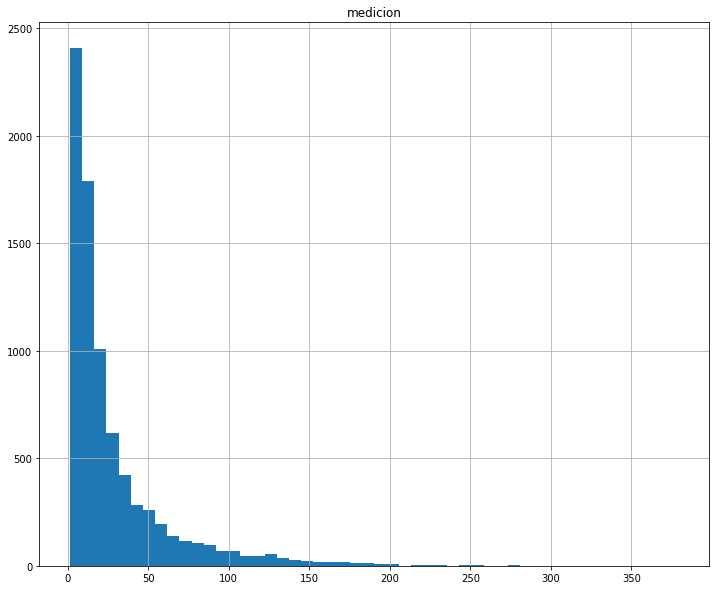

In [15]:
diario_no2.hist(bins=50, figsize=(12,10));

In [16]:
# Medición media anual
diario_no2.resample("Y").mean()

,medicion
fecha,
2001-12-31,57.096068
2002-12-31,43.646110
2003-12-31,42.055632
2004-12-31,47.124690
2005-12-31,43.147353
2006-12-31,37.992130
2007-12-31,37.500623
2008-12-31,30.391584
2009-12-31,28.397910


## Variables de paso de tiempo (*time-step*)

Vamos a crear una variable de paso de tiempo (*time-step*).

In [17]:
diario_no2["time"] = np.arange(len(diario_no2.index))

diario_no2.head()

,medicion,time
fecha,,
2001-01-01,47.583333,0
2001-01-02,39.000000,1
2001-01-03,53.833333,2
2001-01-04,51.833333,3
2001-01-05,80.083333,4


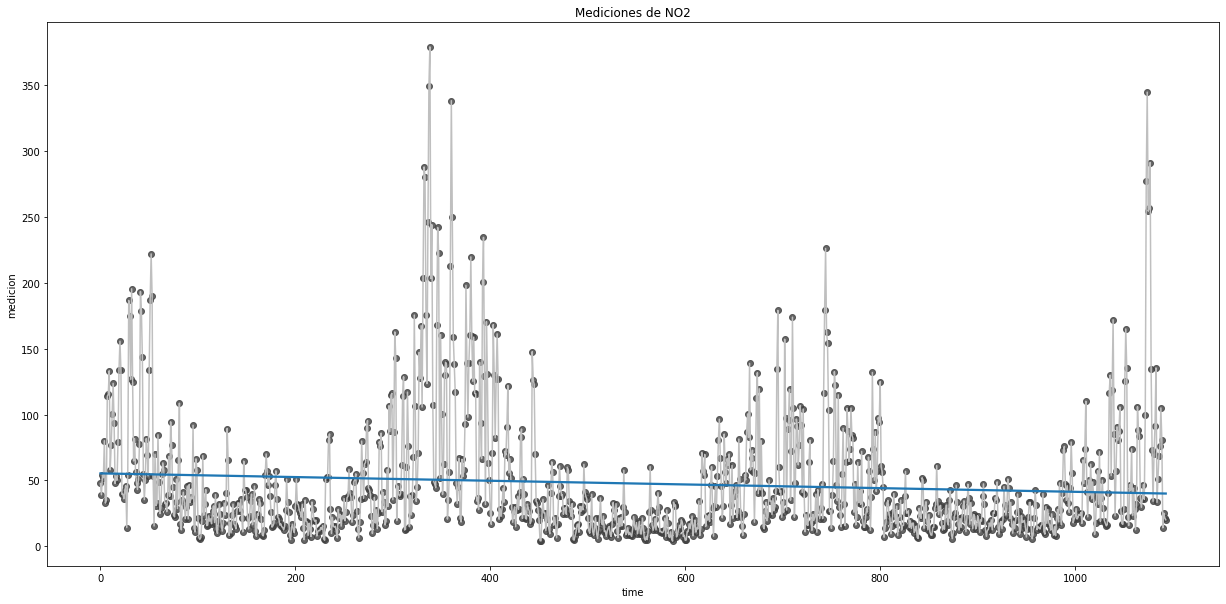

In [18]:
# Mediciones realizadas hasta el año 2003
df = diario_no2[diario_no2.index.year.isin([2001, 2002, 2003])]

fig, ax = plt.subplots(figsize=(21, 10))
ax.plot("time", "medicion", data=df, color="0.75")
ax = sns.regplot(x="time", y="medicion", data=df, ci=None,
                 scatter_kws=dict(color="0.25"))
ax.set_title("Mediciones de NO2");

Las features de paso de tiempo nos permiten modelar la dependencia del tiempo. Una serie es dependiente del tiempo si sus valores se pueden predecir desde el momento en que ocurrieron. En las series de nuestro ejemplo, podemos predecir que las mediciones de NO2 al principio y final del año (otoño-invierno) son generalmente más altas que las mediciones realizadas durante los meses de mitad de año (primavera-verano).

## Variables *lag*

Vamos a creanos una variable *lag*. Las variable de lag nos permiten modelar la dependencia en serie o serial.

In [19]:
diario_no2["Lag_1"] = diario_no2["medicion"].shift(1)
diario_no2.head()

,medicion,time,Lag_1
fecha,,,
2001-01-01,47.583333,0,NaN
2001-01-02,39.000000,1,47.583333
2001-01-03,53.833333,2,39.000000
2001-01-04,51.833333,3,53.833333
2001-01-05,80.083333,4,51.833333


Las variables de lag nos permiten dibujar gráficas donde cada observación en una serie se dibuja contra la observación anterior.

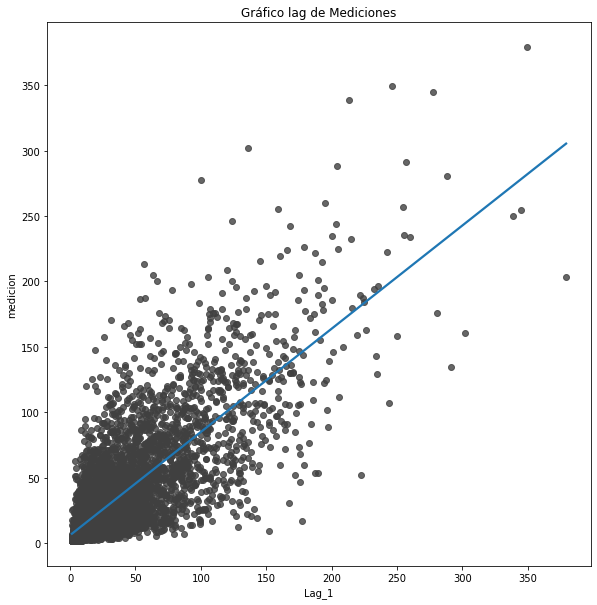

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.regplot(x="Lag_1", y="medicion", data=diario_no2, ci=None,
                 scatter_kws=dict(color="0.25"))
ax.set_aspect("equal")
ax.set_title("Gráfico lag de Mediciones");

Podemos ver en el gráfico de lag que las mediciones de un día (`medicion`) están correlacionadas con las mediciones del día anterior (`Lag_1`). Cuando vemos una relación como ésta sabemos que una variable de lag será útil.

Una serie temporal tiene dependencia serial cuando una observación se puede predecir a partir de las observaciones previas. En nuestro ejemplo, podemos predecir que mediciones altas en un día, generalmente significan mediciones altas en el siguiente día.

## Tendencias

La tendencia de una serie temporal representa un cambio persistente a largo plazo en la media de la serie. La tendencia es la parte más lenta del movimiento de una serie, la parte que representa la mayor escala de tiempo de importancia.

Para ver qué tipo de tendencia podría tener una serie temporal podemos usar un **gráfico de média móvil**. Para calcular una media móvil de una serie temporal, calculamos la media de los valores dentro de una ventana deslizante de un ancho definido. Cada punto del gráfico representa la media de todos los valores de la serie que se encuentran dentro de la ventada de cada lado. La idea es suavizar cualquier fluctuación a corto plazo en la serie para que solo permanezcan los cambios a largo plazo.

In [21]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(15, 7))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

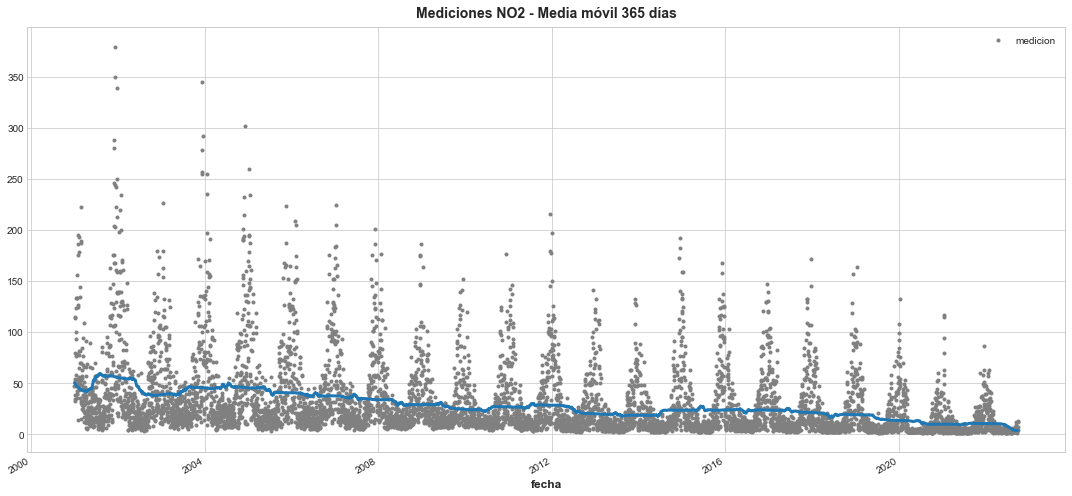

In [22]:
moving_average = diario_no2[["medicion"]].rolling(
    window=365,       # ventana de 365 días
    center=True,      # pone la media en el dentro de la ventana
    min_periods=183,  # selecciona la mitad del tamaño de la ventana
).mean()              # calcula la media (también podría hacerse la mediana, desviación, mínimo, máximo, ...)

ax = diario_no2[["medicion"]].plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Mediciones NO2 - Media móvil 365 días", legend=False,
);

La tendencia parece ser lineal.

Aunque podemos crear directamente en Pandas nuestra *time dummy*, usaremos una función de la librería `statsmodels` llamada `DeterministicProcess`

In [23]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=diario_no2.index,  # fechas de los datos de entrenamiento
    constant=True,       # variable dummy para el bias (y_intercept)
    order=1,             # la time dummy (tendencia)
    drop=True,           # elimina términos si es necesario para evitar colinearidad
)
# crea features para las fechas dadas en el argumento `index`
X = dp.in_sample()

X.head()

,const,trend
fecha,,
2001-01-01,1.0,1.0
2001-01-02,1.0,2.0
2001-01-03,1.0,3.0
2001-01-04,1.0,4.0
2001-01-05,1.0,5.0


In [24]:
X.index

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
               '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', name='fecha', length=7942, freq=None)

In [25]:
from sklearn.linear_model import LinearRegression

y = diario_no2["medicion"]  # objetivo

# intercept es lo mismo que la variable `const` de DeterministicProcess.
# LinearRegression se comporta mal con features duplicadas,
# así que necesitamos asegurarnos de excluirlas aquí.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

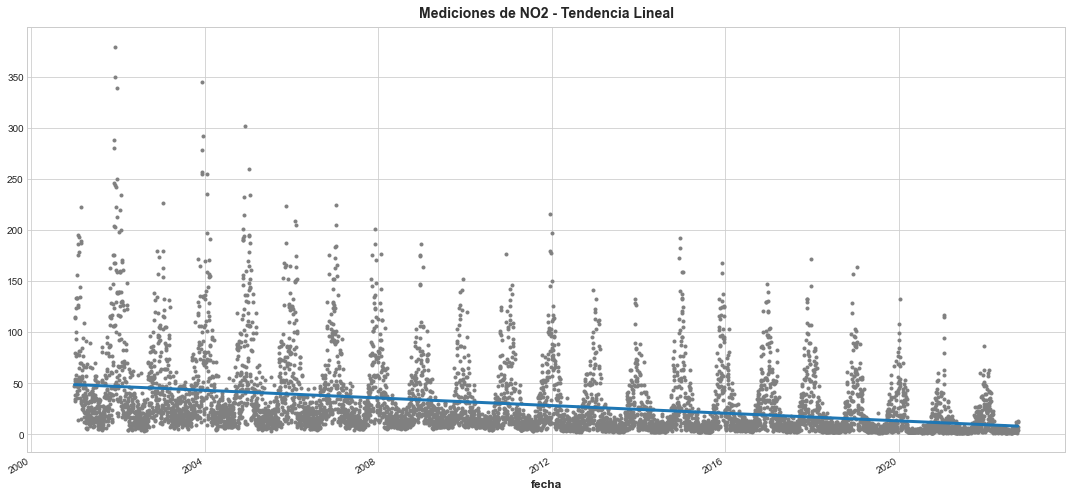

In [26]:
ax = diario_no2["medicion"].plot(style=".", color="0.5", title="Mediciones de NO2 - Tendencia Lineal")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

La tendencia descubierta por nuestro modelo de regresión lineal es casi idéntica a la gráfica de media móvil, lo que sugiere que una tendencia lineal fue la decisión correcta en este caso.

## Estacionalidad

Se dice que una serie temporal exhibe estacionalidad siempre que haya un cambio regular y periodico en la media de la serie. Veremos que hay dos tipos de variables que modelan la estacionalidad. El primer tipo, los indicadores, es mejor para una estacionalidad con pocas observaciones, como la estacionalidad semanal de observaciones diarias. El segundo tipo, variables Fourier, es mejor para una estacionalidad con muchas observaciones, como la estacionalidad anual de observaciones diarias.

Podemos usar una **gráfica estacional** para descubrir patrones estacionales.

In [27]:
def fourier_features(index, freq, order):
    time = np.arange(len(index), dtype=np.float32)
    k = 2 * np.pi * (1 / freq) * time
    features = {}
    for i in range(1, order + 1):
        features.update({
            f"sin_{freq}_{i}": np.sin(i * k),
            f"cos_{freq}_{i}": np.cos(i * k),
        })
    return pd.DataFrame(features, index=index)

In [28]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [29]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Gráfico estacional ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

In [30]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

Echemos un vistazo al gráfico estacional durante una semana y durante un año.

In [31]:
X = diario_no2.copy()

C:\Users\futit\AppData\Local\Temp\ipykernel_11404\1253608424.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X["week"] = X.index.week  # periodo estacional (period)


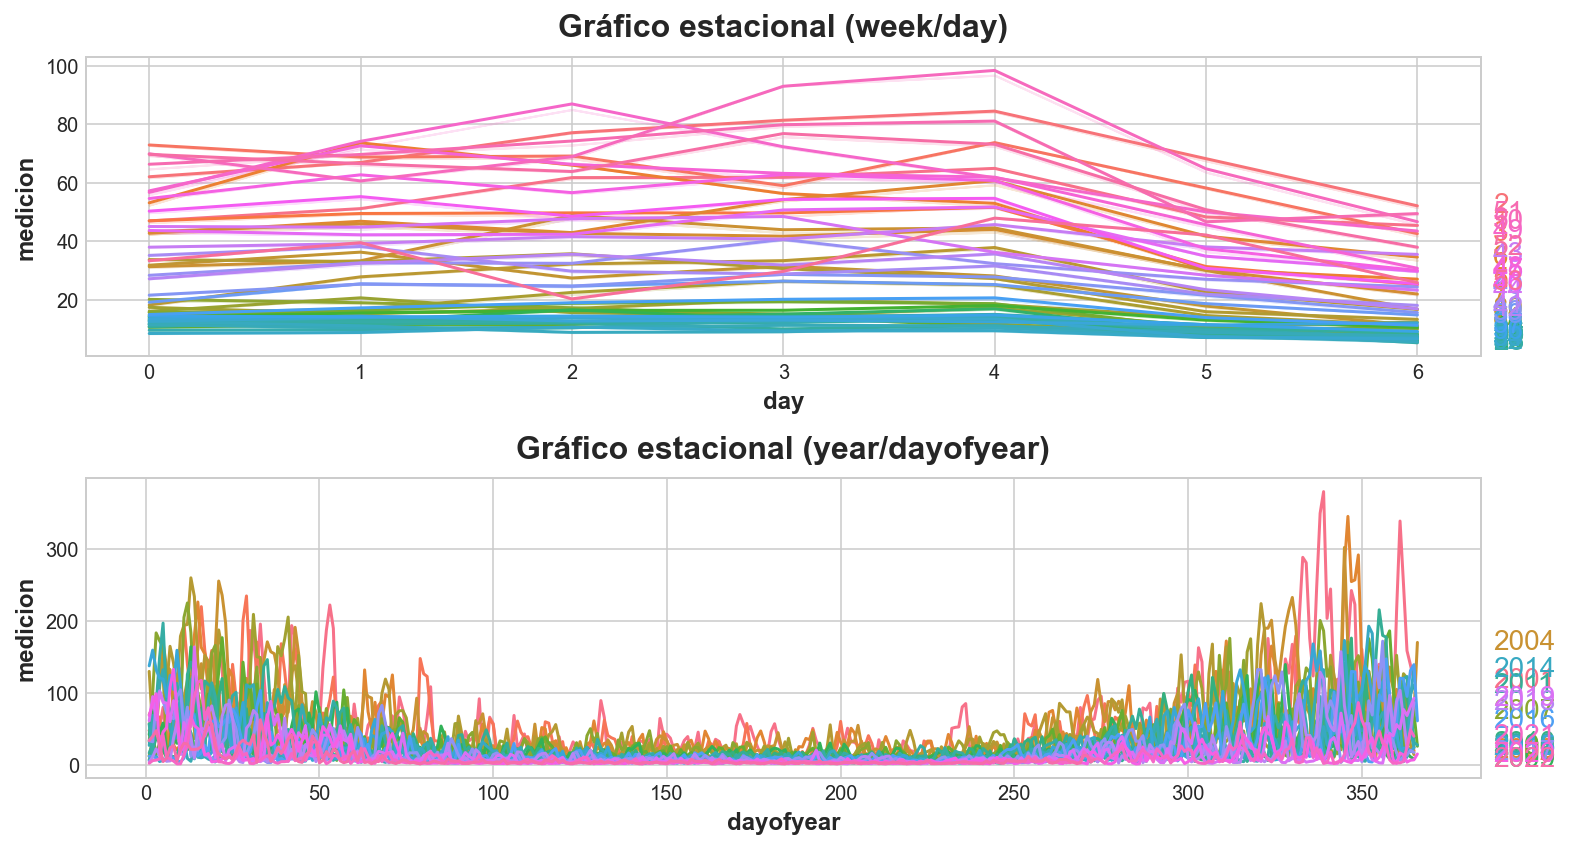

In [32]:
# días dentro de una semana
X["day"] = X.index.dayofweek  # eje x (freq)
X["week"] = X.index.week  # periodo estacional (period)

# días dentro de un año
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="medicion", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="medicion", period="year", freq="dayofyear", ax=ax1);

Veamos ahora el periodograma:

C:\Users\futit\AppData\Local\Temp\ipykernel_11404\4287559274.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  plot_periodogram(diario_no2["medicion"]);


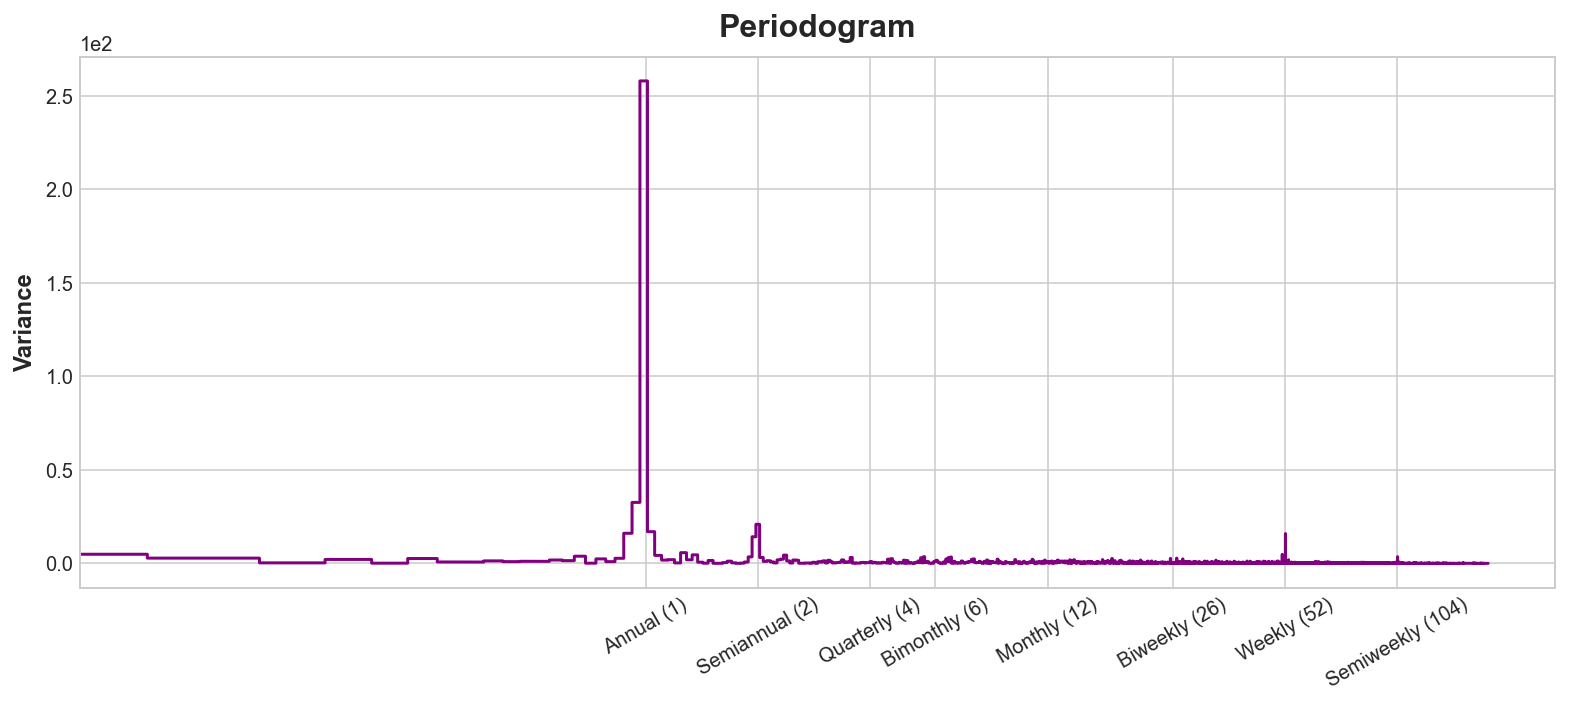

In [33]:
plot_periodogram(diario_no2["medicion"]);

In [34]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=10)  # 10 pares seno/coseno para estacionalidad "A"nual

diario_no2 = diario_no2.asfreq('D')

dp = DeterministicProcess(
    index=diario_no2.index,
    constant=True,               # feature dummy para bias (y-intercept)
    order=1,                     # tendencia (orden 1 significa lineal)
    seasonal=True,               # estacionalidad semanal (indicadores)
    additional_terms=[fourier],  # estacionalidad anual (fourier)
    drop=True,                   # eliminamos términos para evitar colinealidad
)